In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [32]:
abalone_features = pd.read_csv("C:/Users/진현킴/Downloads/abalone.data")

In [34]:
abalone_features

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [30]:
abalone.dropna()

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [31]:
abalone.isnull().sum()

M         0
0.455     0
0.365     0
0.095     0
0.514     0
0.2245    0
0.101     0
0.15      0
15        0
dtype: int64

Text(0.5, 1.0, 'class')

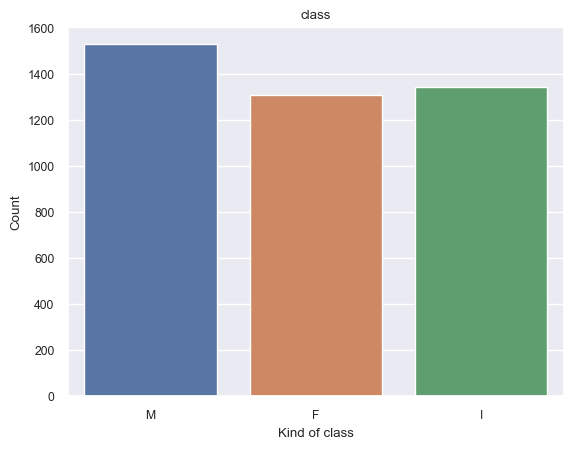

In [40]:
import seaborn as sns
sns.countplot(data = abalone, x="M")
plt.xlabel("Kind of class")
plt.ylabel("Count")
plt.title("class")

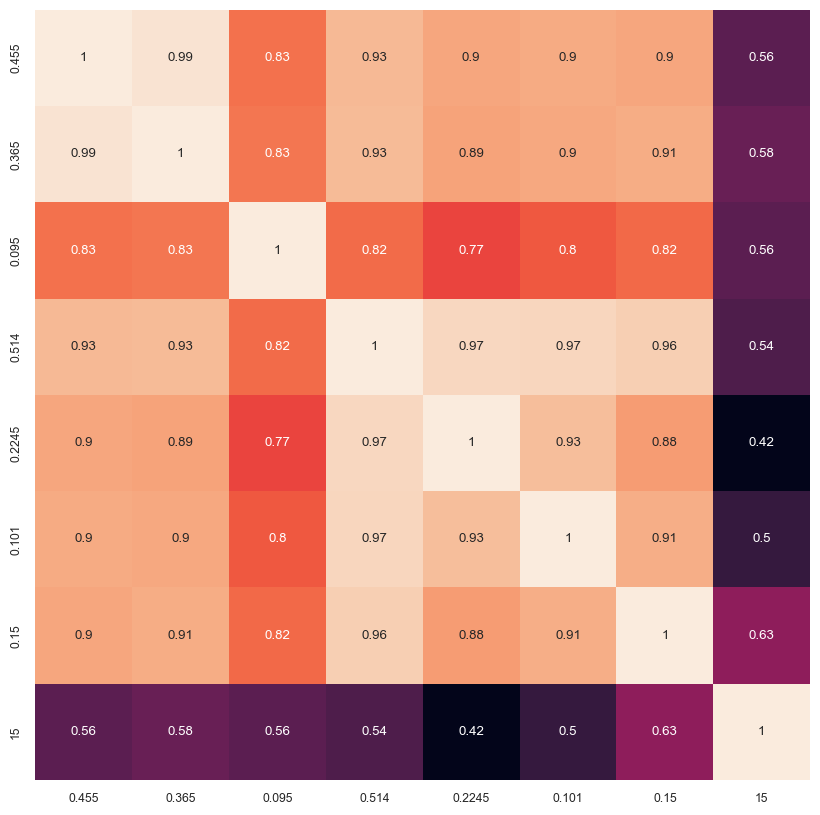

In [41]:
#상관 관계 행렬
df_corr=abalone.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in abalone.columns :
    abalone[i] = le.fit_transform(abalone[i])

In [43]:
abalone

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,2,45,36,17,285,178,94,113,6
1,0,81,67,26,962,480,280,374,8
2,2,63,56,24,718,400,225,273,9
3,1,41,34,15,253,159,76,87,6
4,1,60,43,18,463,254,152,207,7
...,...,...,...,...,...,...,...,...,...
4171,0,88,73,32,1289,698,475,442,10
4172,2,93,71,26,1411,832,426,463,9
4173,2,95,78,40,1727,994,571,550,8
4174,0,100,80,29,1610,1005,518,530,9


In [129]:
X = abalone.iloc[:,0:4].values

In [130]:
y = abalone['0.15']

In [131]:
y

0       113
1       374
2       273
3        87
4       207
       ... 
4171    442
4172    463
4173    550
4174    530
4175    813
Name: 0.15, Length: 4176, dtype: int64

In [132]:
from sklearn.preprocessing import LabelEncoder
## from keras.utils import to_categorical

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
## y_one_hot = to_categorical(y_encoded, num_classes=2)
Y = pd.get_dummies(y_encoded).values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [133]:
print(y_train.shape)
print(y_test.shape)

(3340, 926)
(836, 926)


In [134]:
import numpy as np

mean = np.mean(X_train, axis = 0)

std = np.std(X_train, axis = 0)

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [135]:
print(np.any(np.isnan(X_train)))
print(np.any(np.isnan(X_test)))
print(np.any(np.isinf(X_train)))
print(np.any(np.isinf(X_test)))

False
False
False
False


In [136]:
X_train = pd.DataFrame(X_train).fillna(0).values
X_test = pd.DataFrame(X_test).fillna(0).values

In [137]:
print(np.any(np.isnan(X_train)))
print(np.any(np.isnan(X_test)))
print(np.any(np.isinf(X_train)))
print(np.any(np.isinf(X_test)))

False
False
False
False


In [138]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(32, activation = 'relu', input_shape = (4,)))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'softmax')) 

model.compile(optimizer = 'rmsprop', loss='mse', metrics = ['mse'])

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 32)                160       
                                                                 
 dense_33 (Dense)            (None, 16)                528       
                                                                 
 dense_34 (Dense)            (None, 1)                 17        
                                                                 
Total params: 705
Trainable params: 705
Non-trainable params: 0
_________________________________________________________________


In [144]:
N_EPOCHS = 100
history = model.fit(X_train, y_train, epochs = N_EPOCHS, validation_data=(X_test, y_test))

Epoch 1/100
105/105 [==============================] - 1s 5ms/step - loss: 0.9989 - mse: 0.9989 - val_loss: 0.9989 - val_mse: 0.9989
Epoch 2/100
105/105 [==============================] - 1s 6ms/step - loss: 0.9989 - mse: 0.9989 - val_loss: 0.9989 - val_mse: 0.9989
Epoch 3/100
105/105 [==============================] - 1s 6ms/step - loss: 0.9989 - mse: 0.9989 - val_loss: 0.9989 - val_mse: 0.9989
Epoch 4/100
105/105 [==============================] - 1s 5ms/step - loss: 0.9989 - mse: 0.9989 - val_loss: 0.9989 - val_mse: 0.9989
Epoch 5/100
105/105 [==============================] - 1s 5ms/step - loss: 0.9989 - mse: 0.9989 - val_loss: 0.9989 - val_mse: 0.9989
Epoch 6/100
105/105 [==============================] - 1s 5ms/step - loss: 0.9989 - mse: 0.9989 - val_loss: 0.9989 - val_mse: 0.9989
Epoch 7/100
105/105 [==============================] - 1s 5ms/step - loss: 0.9989 - mse: 0.9989 - val_loss: 0.9989 - val_mse: 0.9989
Epoch 8/100
105/105 [==============================] - 0s 5ms/step - 

105/105 [==============================] - 0s 5ms/step - loss: 0.9989 - mse: 0.9989 - val_loss: 0.9989 - val_mse: 0.9989
Epoch 63/100
105/105 [==============================] - 1s 5ms/step - loss: 0.9989 - mse: 0.9989 - val_loss: 0.9989 - val_mse: 0.9989
Epoch 64/100
105/105 [==============================] - 0s 5ms/step - loss: 0.9989 - mse: 0.9989 - val_loss: 0.9989 - val_mse: 0.9989
Epoch 65/100
105/105 [==============================] - 1s 6ms/step - loss: 0.9989 - mse: 0.9989 - val_loss: 0.9989 - val_mse: 0.9989
Epoch 66/100
105/105 [==============================] - 1s 5ms/step - loss: 0.9989 - mse: 0.9989 - val_loss: 0.9989 - val_mse: 0.9989
Epoch 67/100
105/105 [==============================] - 1s 6ms/step - loss: 0.9989 - mse: 0.9989 - val_loss: 0.9989 - val_mse: 0.9989
Epoch 68/100
105/105 [==============================] - 1s 6ms/step - loss: 0.9989 - mse: 0.9989 - val_loss: 0.9989 - val_mse: 0.9989
Epoch 69/100
105/105 [==============================] - 1s 5ms/step - loss:

In [145]:
model.evaluate(X_test, y_test)

27/27 [==============================] - 0s 3ms/step - loss: 0.9989 - mse: 0.9989


[0.9989202618598938, 0.9989202618598938]

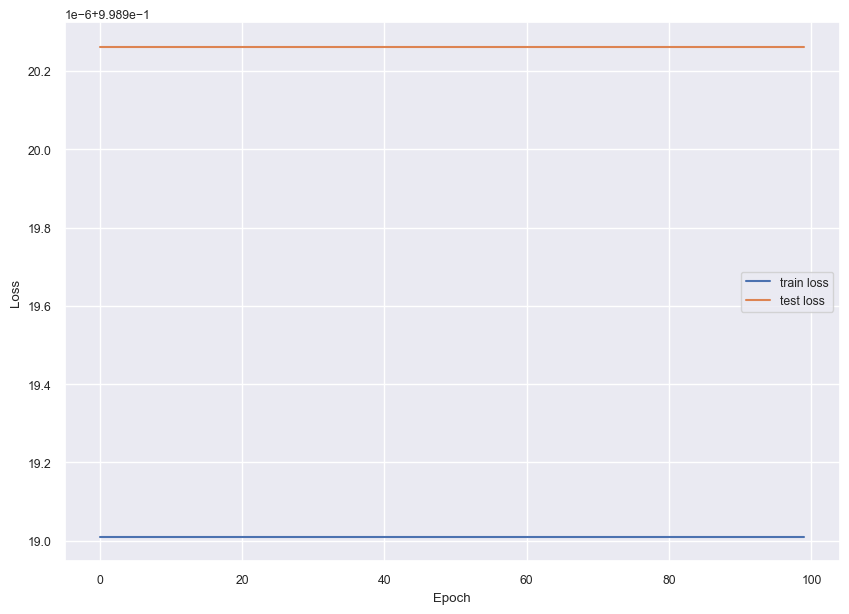

In [146]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()